In [7]:
# Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
df = pd.read_csv("/Users/hannahkollmann/Desktop/heart_disease_dataset.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,0,0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,1,1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,2,2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,3,3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,4,4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0


In [9]:
# Drop the Unnamed columns to optimize model 
df = df.drop(['Unnamed: 0.1', 'Unnamed: 0'],axis=1)
df.head()

,Age,Gender,Cholesterol,Blood Pressure,Heart Rate,Smoking,Alcohol Intake,Exercise Hours,Family History,Diabetes,Obesity,Stress Level,Blood Sugar,Exercise Induced Angina,Chest Pain Type,Heart Disease
0,75,Female,228,119,66,Current,Heavy,1,No,No,Yes,8,119,Yes,Atypical Angina,1
1,48,Male,204,165,62,Current,NaN,5,No,No,No,9,70,Yes,Typical Angina,0
2,53,Male,234,91,67,Never,Heavy,3,Yes,No,Yes,5,196,Yes,Atypical Angina,1
3,69,Female,192,90,72,Current,NaN,4,No,Yes,No,7,107,Yes,Non-anginal Pain,0
4,62,Female,172,163,93,Never,NaN,6,No,Yes,No,2,183,Yes,Asymptomatic,0


In [13]:
# Determine the number of unique values in each column.
df.nunique()

Age                         55
Gender                       2
Cholesterol                200
Blood Pressure              90
Heart Rate                  40
Smoking                      3
Alcohol Intake               2
Exercise Hours              10
Family History               2
Diabetes                     2
Obesity                      2
Stress Level                10
Blood Sugar                130
Exercise Induced Angina      2
Chest Pain Type              4
Heart Disease                2
dtype: int64

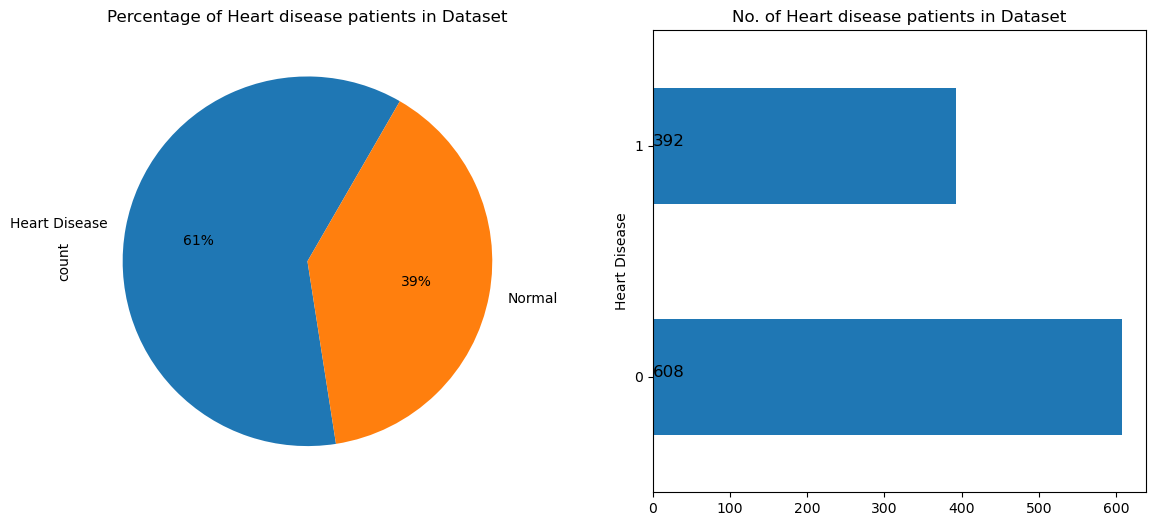

In [33]:
# Data Visualization
# Checking distribution of heart disease, 1 = yes, 2 = no
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(14,6))

ax1 = df['Heart Disease'].value_counts().plot.pie( x="Heart disease" ,y ='no.of patients', 
                   autopct = "%1.0f%%",labels=["Heart Disease","Normal"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of Heart disease patients in Dataset')

ax2 = df["Heart Disease"].value_counts().plot(kind="barh" ,ax =ax2)
for i,j in enumerate(df["Heart Disease"].value_counts().values):
    ax2.text(.5,i,j,fontsize=12)
ax2.set(title = 'No. of Heart disease patients in Dataset')
plt.show()

/var/folders/6r/srxpnsnn51z8z63b1s33wbbc0000gn/T/ipykernel_65481/1737983740.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['Chest Pain Type'], palette='viridis')


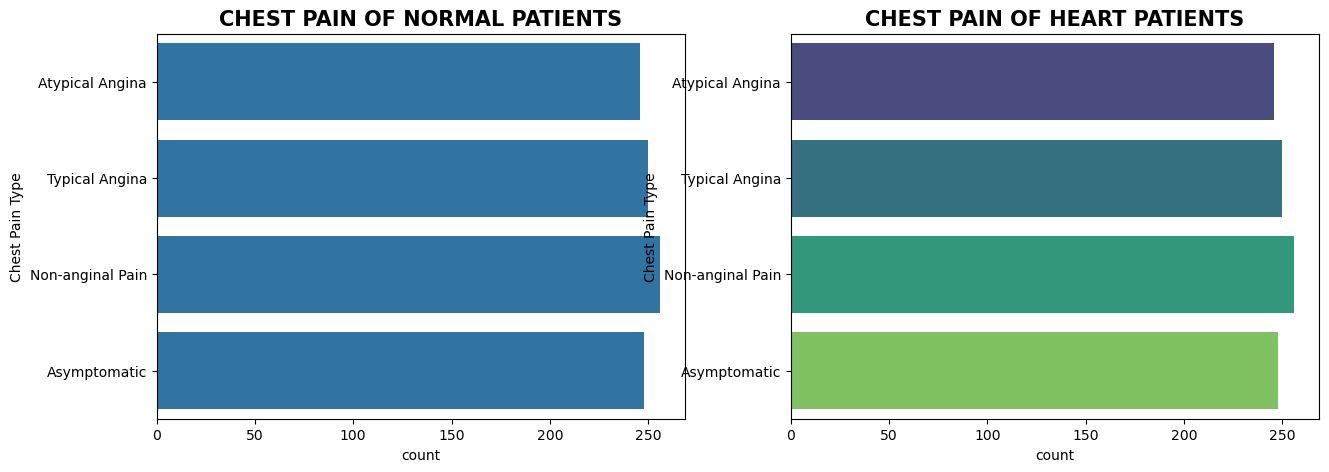

In [85]:
# Plotting normal patients
fig = plt.figure(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(df['Chest Pain Type'])
plt.title('CHEST PAIN OF NORMAL PATIENTS', fontsize=15, weight='bold')

# Plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(df['Chest Pain Type'], palette='viridis')
plt.title('CHEST PAIN OF HEART PATIENTS', fontsize=15, weight='bold' )
plt.show()

In [95]:
# Exploring the Heart Disease patients based on Chest Pain Type
plot_criteria= ['Chest Pain Type', 'Heart Disease']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

Heart Disease,0,1
Chest Pain Type,,
Asymptomatic,24.010000,26.020000
Atypical Angina,24.010000,25.510000
Non-anginal Pain,27.300000,22.960000
Typical Angina,24.670000,25.510000


In [101]:
# Based on the information above, 26% of the chest pain type of the heart disease patients have asymptomatic chest pain.
# Asymptomatic heart attacks medically known as silent myocardial infarction (SMI) annually accounts for around 45-50% of morbidities due to cardiac ailments.


/var/folders/6r/srxpnsnn51z8z63b1s33wbbc0000gn/T/ipykernel_65481/4251598399.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax= sns.distplot(df['Age'], rug=True)


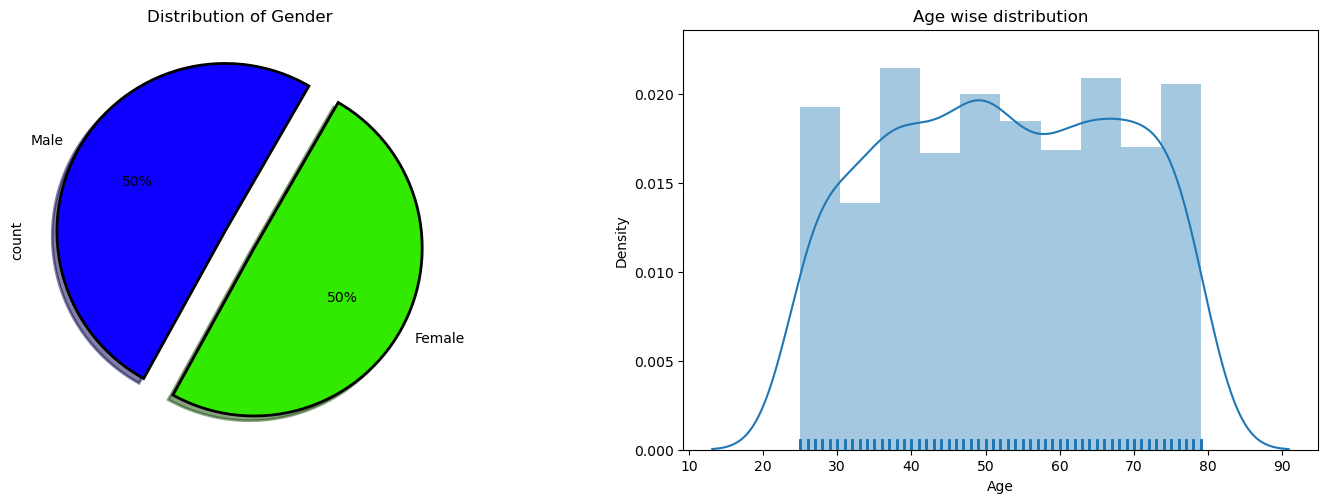

In [87]:
# Import seaborn 
import seaborn as sns

plt.figure(figsize=(18,12))
plt.subplot(221)
df["Gender"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",5),startangle = 60,labels=["Male","Female"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,.1],shadow =True)
plt.title("Distribution of Gender")
plt.subplot(222)
ax= sns.distplot(df['Age'], rug=True)
plt.title("Age wise distribution")
plt.show()

In [57]:
# Convert categorical data to numeric with `pd.get_dummies`
get_dummies_df = pd.get_dummies(df)
get_dummies_df.head()

,Age,Cholesterol,Blood Pressure,Heart Rate,Exercise Hours,Stress Level,Blood Sugar,Heart Disease,Gender_Female,Gender_Male,...,Diabetes_No,Diabetes_Yes,Obesity_No,Obesity_Yes,Exercise Induced Angina_No,Exercise Induced Angina_Yes,Chest Pain Type_Asymptomatic,Chest Pain Type_Atypical Angina,Chest Pain Type_Non-anginal Pain,Chest Pain Type_Typical Angina
0,75,228,119,66,1,8,119,1,True,False,...,True,False,False,True,False,True,False,True,False,False
1,48,204,165,62,5,9,70,0,False,True,...,True,False,True,False,False,True,False,False,False,True
2,53,234,91,67,3,5,196,1,False,True,...,True,False,False,True,False,True,False,True,False,False
3,69,192,90,72,4,7,107,0,True,False,...,False,True,True,False,False,True,False,False,True,False
4,62,172,163,93,6,2,183,0,True,False,...,False,True,True,False,False,True,True,False,False,False


In [113]:
# Split our preprocessed data into our features and target arrays
X = get_dummies_df.drop(["Heart Disease"], axis='columns').values
y = df["Heart Disease"].values


# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

In [117]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [119]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
input_features = X_train.shape[1]
nn = tf.keras.models.Sequential()


# First hidden layer
nn.add(tf.keras.layers.Dense(units=42, activation='relu', input_dim=input_features))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=21, activation='relu'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 42)             │         1,134 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 21)             │           903 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,059 (8.04 KB)

 Trainable params: 2,059 (8.04 KB)

 Non-trainable params: 0 (0.00 B)

In [121]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [123]:
# Train the model
model = nn.fit(X_train_scaled, y_train, validation_split=0.15, epochs=100)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4816 - loss: 0.7610 - val_accuracy: 0.5487 - val_loss: 0.7250
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5921 - loss: 0.6636 - val_accuracy: 0.6372 - val_loss: 0.6696
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7058 - loss: 0.5814 - val_accuracy: 0.6637 - val_loss: 0.6068
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7731 - loss: 0.5174 - val_accuracy: 0.7522 - val_loss: 0.5549
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8235 - loss: 0.4573 - val_accuracy: 0.7522 - val_loss: 0.5066
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8620 - loss: 0.4087 - val_accuracy: 0.7788 - val_loss: 0.4685
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8517 - loss: 0.3683 - val_accuracy: 0.7965 - val_loss: 0.4363
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9082 - loss: 0.2957 - val_accuracy: 0.8319

In [125]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - 20ms/step - accuracy: 0.8680 - loss: 0.4072
Loss: 0.4072398543357849, Accuracy: 0.8679999709129333
